In [1]:
import pathlib

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

BATCH_SIZE = 32
IMAGE_SIZE = (512, 512)

data_dir = str((pathlib.Path.cwd().parent /
                'data/train_image/regrouped').resolve())
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                                    validation_split=0.2,
                                                                    subset="training",
                                                                    seed=137,
                                                                    image_size=IMAGE_SIZE,
                                                                    batch_size=BATCH_SIZE)
validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(data_dir,
                                                                         validation_split=0.2,
                                                                         subset="validation",
                                                                         seed=137,
                                                                         image_size=IMAGE_SIZE,
                                                                         batch_size=BATCH_SIZE)

class_names = train_dataset.class_names
print(class_names)

Found 1164 files belonging to 3 classes.
Using 932 files for training.
Found 1164 files belonging to 3 classes.
Using 232 files for validation.
['0', '1', '2']


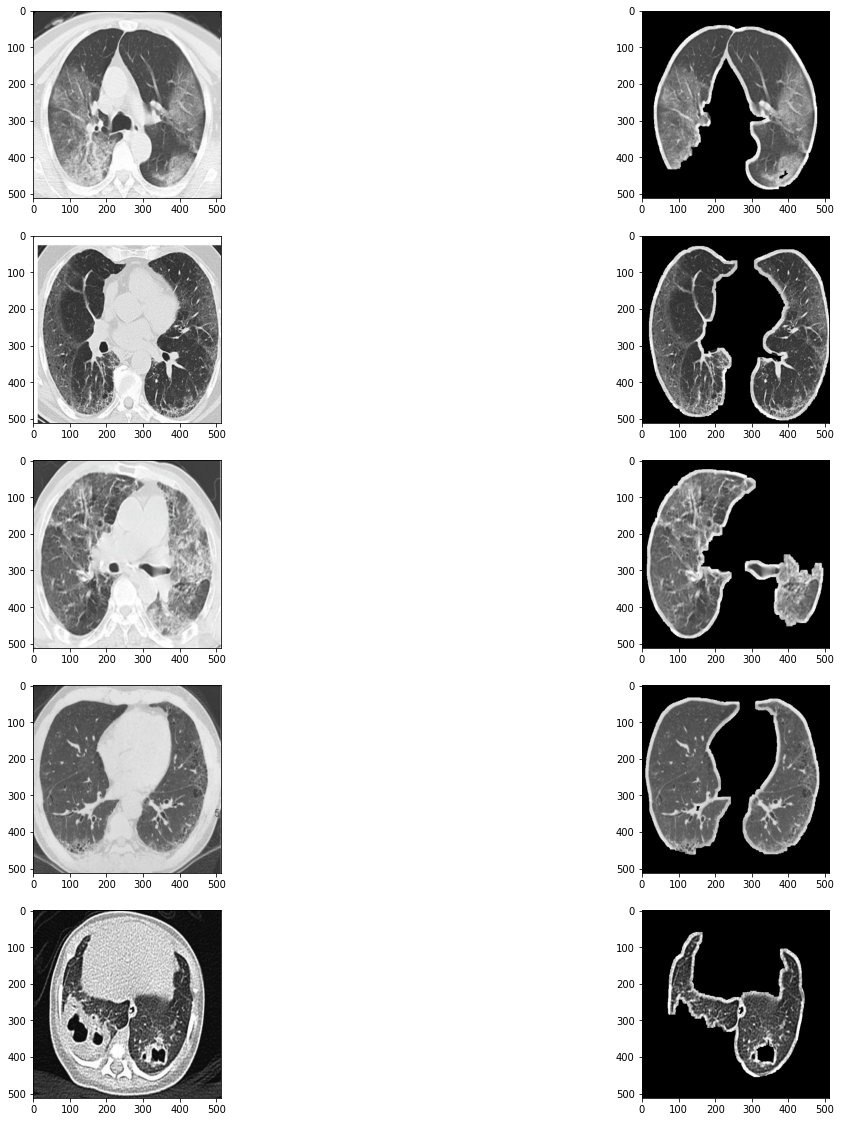

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import (measure, morphology, segmentation)

%matplotlib inline

show_examples = 5
fig, ax = plt.subplots(show_examples, 2, figsize=(
    show_examples * 4, show_examples * 4))

images = [image.numpy() for images in train_dataset.take(1)
          for image in images]

for index in range(show_examples):
    example = images[0][index].astype("uint8")
    ax[index][0].imshow(example)

    image = example < example.mean()
    for c in range(image.shape[2]):
        image[:, :, c] = segmentation.clear_border(image[:, :, c])

    label_image = measure.label(image)
    regions = measure.regionprops(label_image)
    areas = [(r.area, r.label) for r in regions]
    areas.sort()

    if len(areas) > 2:
        max_area = areas[-2][0]
        for r in regions:
            if r.area < max_area:
                for c in r.coords:
                    image[c[0], c[1], c[2]] = 0

    image = morphology.binary_erosion(image, selem=np.ones((1, 1, 1)))
    image = morphology.binary_closing(image, selem=np.ones((4, 4, 4)))
    image = morphology.binary_dilation(image, selem=np.ones((16, 16, 16)))

    ax[index][1].imshow(np.multiply(image, example))